In [1]:
# %load main.py
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt

from config import config
import mysql_utils as mysql
import preprocessing
import visualization

In [2]:
DATA_FREQUENCY = dt.timedelta(minutes=5)

In [3]:
# DETECTOR_DATA_TABLE = "detector_data_processed_2017"
DETECTOR_ID = "608219"
# DETECTOR_DATA_QUERY = "SELECT DetectorID, Year, Month, Day, Time, Volume, Occupancy\
#                         FROM {} AS DD NATURAL JOIN detector_health AS DH\
#                         WHERE DetectorID = {} AND Health = 1\
#                         ORDER BY Year, Month, Day, Time;".format(DETECTOR_DATA_TABLE, DETECTOR_ID)

In [4]:
flow = pd.read_csv("data/detector_{}_flow_original.csv".format(DETECTOR_ID), index_col=0, parse_dates=True)

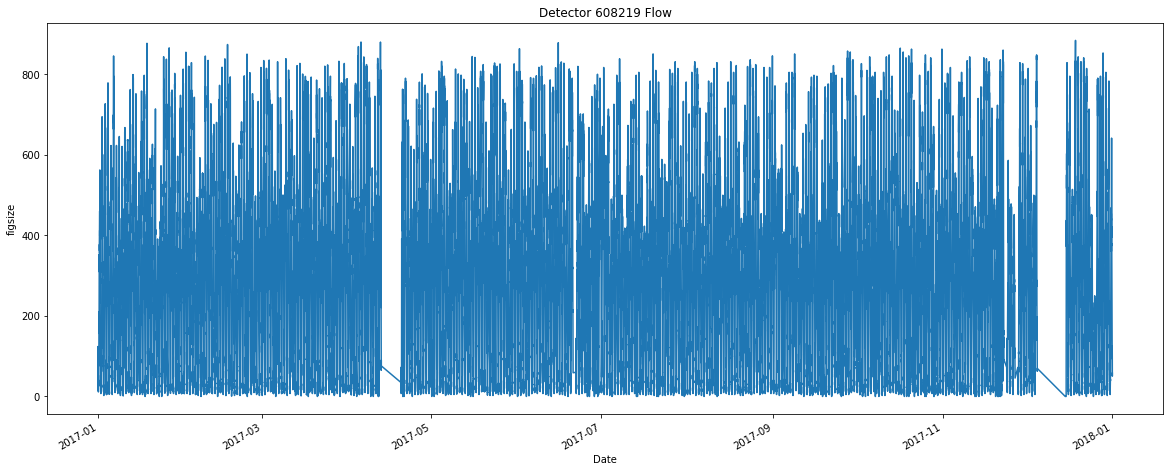

In [5]:
visualization.plot_data_over_time(flow, title="Detector {} Flow".format(DETECTOR_ID), ylabel="Flow", figsize=(20, 8))

In [6]:
_, flow_stretch = preprocessing.get_longest_continuous_stretch_of_data(flow, DATA_FREQUENCY)

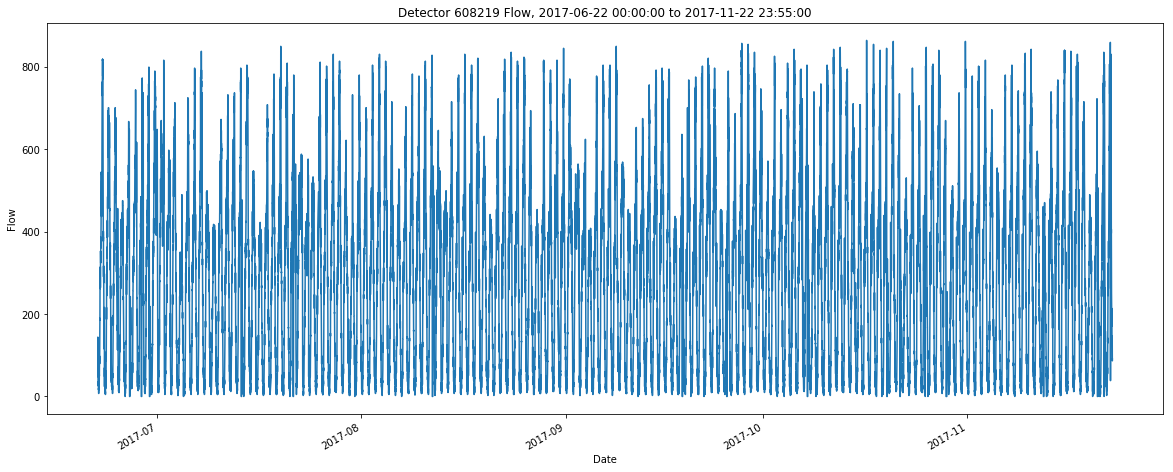

In [8]:
visualization.plot_data_over_time(flow_stretch, title="Detector {} Flow, {} to {}"
                                  .format(DETECTOR_ID, flow_stretch.index[0], flow_stretch.index[-1]),
                                  ylabel="Flow", figsize=(20, 8))